In [ ]:
#Tego nie będzie w finalnej wersji
import sys
sys.path.append('..')
from evolver import evolve_agat
from generator import polar_curve
import numpy as np
import matplotlib.pyplot as plt

## Opis modelu

Agaty to minerały złożone z mikrokrystalicznej krzemionki ułożonej w charakterystyczne warstwy. Agaty wypełniają zwykle pustki po pęcherzach gazowych uwięzionych w stygnącej lawie. Jedna z teorii ich powstawania mówi, że kolejne warstwy krzemionki osadzały się na ściankach takiej pustki, a kolorowe paski są odzwierciedleniem różnych w składzie chemicznym roztworu na przestrzeni setek tysięcy lat, w czasie których tworzył się agat.
W zadaniu spróbujemy znaleźć kształty poszczególnych warstw agatu zakładając, że wzrost (w kierunku od ścianek do środka buły agatowej) odbywa się ze stałą prędkością (czyli nowa warstwa składa się z punktów będących w ustalonej odległości od warstwy poprzedniej). Taki wzrost ma naturalną tendencję do generowania „ostrych kantów”. Takie punkty z nieciągłą pochodną są często widoczne w agatach, co jest argumentem za tym, że ten prosty model wzrostu może być w tym przypadku właściwy.

## Zadanie

Końcowym efektem naszej pracy jest *agate evolver*, który produkuje strukturę warstw dla danej początkowej geometrii agatu w dwóch i trzech wymiarach. Przetestowaliśmy go na rzeczywistych agatach, aby sprawdzić, czy numerycznie wygenerowana struktura pasm pokrywa się z rzeczywistą.

## Model 2D

W modelu 2D traktowaliśmy kolejne warstwy jako płaskie krzywe zamknięte, którą można przybliżyć wielokątami. Wykorzystaliśmy klasy `Polygon` i `MultiPolygon` z modułu `geometry` z biblioteki `shapely`. 

Stworzyliśmy funkcję `evolve_agat` pozwalającą wygenerować przekrój agatu o zadanym konturze. Funkcja przyjmuje następujące argumenty:
* `first_layer` - lista wierzchołków zewnętrznej warstwy `[(x1, y1), (x2, y2), ... ]`.
* `layer_width` - odległość pomiędzy kolejnymi warstwami. Domyślnie `0.05`.
* `min_area` - powierzchnia wnętrza agatu. Domyślnie `0.001`.
* `N_apexes` - maksymalna liczba wierzchołków wielokątów reprezentujących kolejne wartswy. Jeśli równa `-1` (domyślnie), to tyle samo co w `first_layer`.
* `fig` - obiekt klasy `Figure` z biblioteki `matplotlib`, na którym ma zostać narysowany wynik symulacji. Domyślnie przyjmuje wartość `None` i rysunek jest wyświetlany po wywołaniu funkcji.

Ewolucję schematycznie przedstawia rysunek \ref{ewolucja_2d}. W każdym kroku ewolucji za pomocą metody `buffer` znajdowany był zbiór $N=$ `N_apexes` punktów odległych o `layer_width` od aktualnej warstwy ($[(x_1,y_1), (x_2, y_2), ..., (x_N, y_N)]$) i znajdujących się wewnątrz wielokąta - te punkty tworzyły kolejną warstwę ($[(x_1',y_1'), (x_2', y_2'), ..., (x_N', y_N')]$). Jej wnętrze $A$ kolorowano na jeden z losowo wybranych kolorów. Następnie przypisywano $x_i \leftarrow x_i'$, $y_i \leftarrow y_i'$ i rozpoczynał się kolejny krok. Ewolucję kontynuowano, aż powierzchnia wielokąta $A$ reprezentującego aktualną warstwę było mniejsze niż `min_area`.

![Ilustracja kroku ewolucji 2d \label{ewolucja_2d}](obrazy/ewolucja2d.png)


## Generowanie konturów

Sztuczne agaty generowaliśmy za pomocą funkcji $r(\varphi)=\frac{1}{1+\alpha} (1 + \frac{\alpha}{1+\alpha}\sin(\beta\varphi)^2)$.

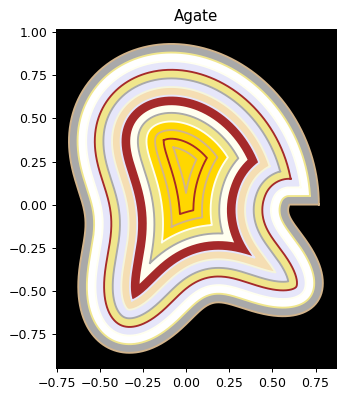

In [48]:
evolve_agat(polar_curve(modulation = 0.3, freq = 2/3))

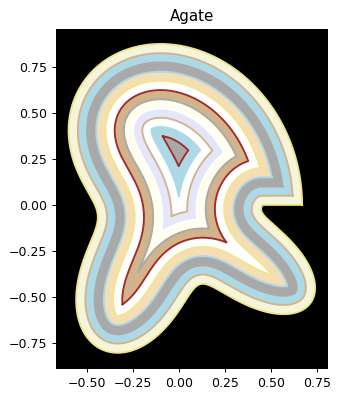

In [49]:
evolve_agat(polar_curve(modulation = 0.5, freq = 2/3))

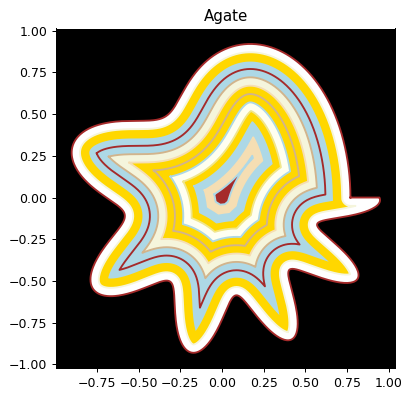

In [51]:
evolve_agat(polar_curve(modulation = 0.3, freq = 1))

### Generowanie konturów



## Interfejs użytkownika
Okno programu przedstawione jest na rysunku 1.

![Rysunek 1. okno programu](obrazy/okno_programu.png)
*Rysunek 1. okno programu*

Składa się z następujących części:

1. **Obszar rysowania**
Użytkownik może zaznaczyć kontur agatu przytrzymując lewy przycisk myszy. W momencie puszczenia przycisku zostanie wygenerowany agat o zaznaczonym konturze. Gdy użytkownik zaczyna rysować nowy kontur, poprzedni rysunek jest usuwany. Przykład wygenerowanego agatu znajduje się na rysunku 2.
![Rysunek 2. wygenerowany agat](obrazy/wygenerowany_agat.png)
*Rysunek 2. wygenerowany agat*

2. **Wczytywanie obrazu**
Program umożliwia wczytanie obrazu w celu porównania wyników modelu z prawdziwymi agatami. Należy podać w polu **2a** ścieżkę do pliku z obrazem w formacie PNG (można pominąć rozszerzenie), a następnie nacisnąć przycisk **2b**. Obraz zostanie wyświetlony w obszarze rysowania. Następnie można zaznaczyć w dowolnym miejscu kontur, a wygenerowany agat zostanie wyświetlony na wczytanym obrazie. Przykład takiego użycia znajduje się na rysunku 3.
![Rysunek 3. agat wygenerowany na rysunku](obrazy/agat_wygenerowany_na_rysunku.png)
*Rysunek 3. agat wygenerowany na rysunku*

3. **Zapisywanie obrazu**
Wygenerowany agat można zapisać jako obraz PNG. W tym celu należy podać w polu **3a** nazwę wynikowego pliku, a następnie nacisnąć przycisk **3b**.

4. **Grubość warstwy**
Użytkownik może ustawić grubość warstwy generowanego agatu, wpisując wartość w polu **4a**, a następnie naciskając przycisk **4b** (dla odniesienia obszar rysowania ma wymiary 1x1). Domyślna wartość: 0.005. Przykład dwóch różnych grubości znajduje się na rysunku 4.
![Rysunek 4. różne grubości warstwy](obrazy/rozne_grubosci_warstwy.png)
*Rysunek 4. różne grubości warstwy*

5. **Powierzchnia wewnętrzna**
Użytkownik może ustawić minimalną powierzchnię, dla której będą generowane warstwy, wpisując wartość w polu **5a**, a następnie naciskając przycisk **5b** (dla odniesienia obszar rysowania ma wymiary 1x1). Domyślna wartość: 0.001. Parametr ten określa jak duża powinna być jednolita powierzchnia w środku generowanego agatu. Przykład dwóch różnych powierzchni znajduje się na rysunku 5.
![Rysunek 5. różne powierzchnie wewnętrzne](obrazy/rozne_powierzchnie_wewnetrzne.png)
*Rysunek 5. różne powierzchnie wewnętrzne*

## Podsumowanie

![Porównanie prawdziwych agatów z wygenerowanymi na podstawie modelu 2d](obrazy/comparison/1.png)
![](obrazy/comparison/2.png)
![](obrazy/comparison/3.png)
![](obrazy/comparison/4.png)
![](obrazy/comparison/5.png)